In [ ]:
! pip install -q kaggle

In [ ]:
# Upload downloaded .json file
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (8).json


{'kaggle.json': b'{"username":"archiestudent","key":"819b95fae3a6324c1882968b2ecc2819"}'}

In [ ]:
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# Check if there is connection
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           7185        226  1.0              
thedevastator/mcdonalds-ice-cream-machines-broken-timeseries   McDonalds Ice Cream Machines Breaking - Timeseries  404KB  2022-09-14 23:51:09            521         25  1.0              
pantanjali/unemployment-dataset                                Unemployment dataset                                 17KB  2022-09-08 08:26:10           1538         55  1.0              
evangower/premier-league-match-data                            Pr

In [ ]:
! kaggle datasets download deepcontractor/smoke-detection-dataset

smoke-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! mkdir smoke
! unzip smoke-detection-dataset.zip -d smoke

mkdir: cannot create directory ‘smoke’: File exists
Archive:  smoke-detection-dataset.zip
replace smoke/smoke_detection_iot.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

#machlearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import graphviz
from IPython.display import Image, display
import pydotplus

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

**Loading the data**

In [ ]:
smoke = pd.read_csv("/content/smoke/smoke_detection_iot.csv")

In [ ]:
smoke.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


**Cleaning the data**

Truncating Irrelevant Features 
The "unnamed" 

In [ ]:
smoke = smoke.drop(['Unnamed: 0'],axis=1)
smoke.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


Missing Value

In [ ]:
smoke.isnull().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

Duplicate removal

In [ ]:
smoke = smoke.drop_duplicates(keep='first')

**Data Exploration**

In [ ]:
smoke.shape

(62630, 15)

In [ ]:
smoke.columns

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [ ]:
smoke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.6 MB


Test the distribution of each features

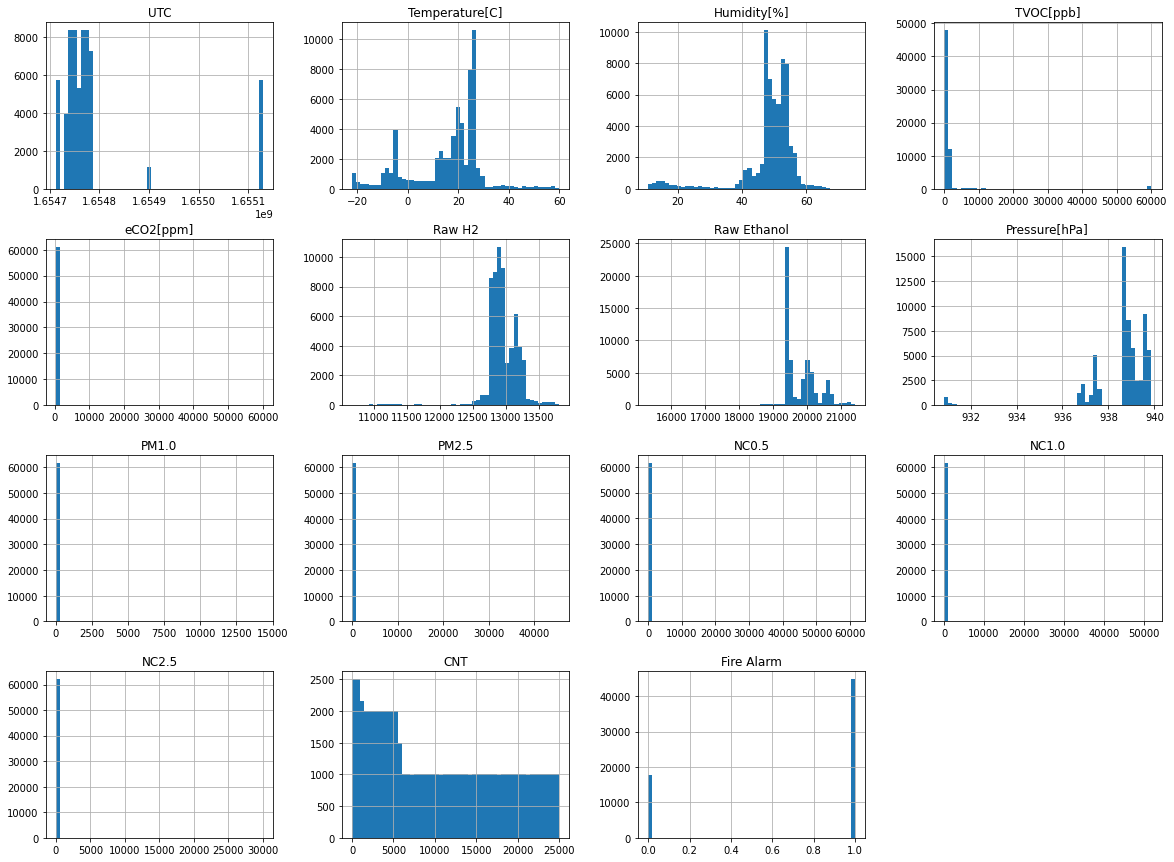

In [ ]:
smoke.hist(bins=50, figsize=(20,15))
plt.show()

Describing the features

In [ ]:
smoke.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


Feature Correlation

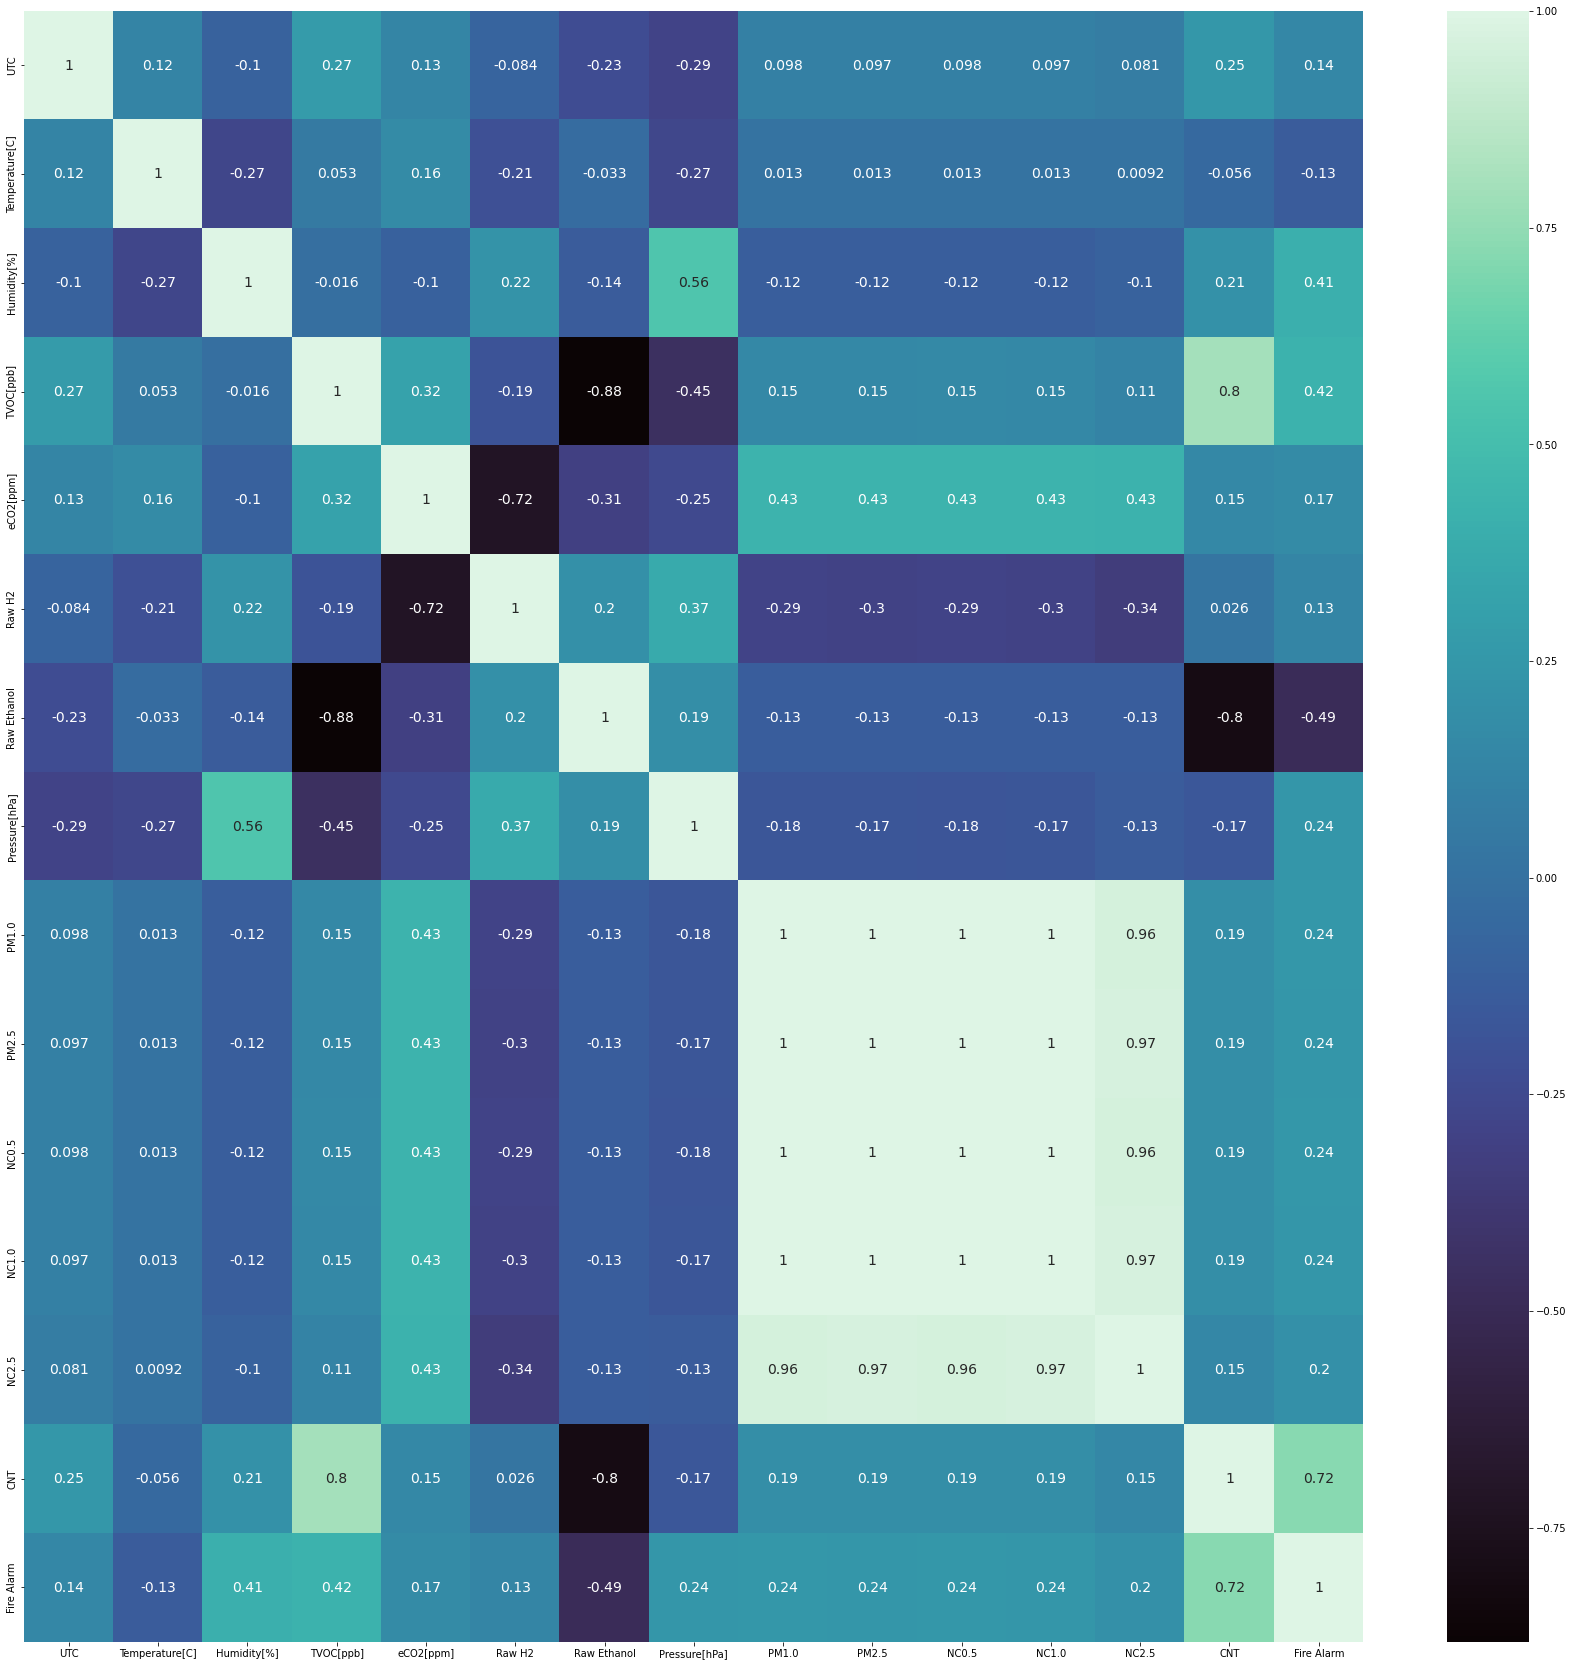

In [ ]:
corr = smoke[smoke.columns].corr(method='spearman')
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap="mako", annot_kws={"size":14})

Pearson correlation

In [ ]:
def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})

In [ ]:
# correlation significant
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix 

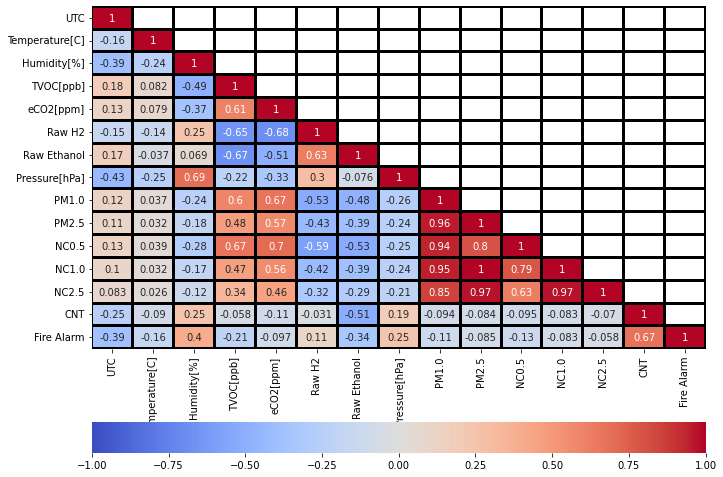

In [ ]:
from scipy import stats

corr = smoke[:-1].corr()
p_values = corr_sig(smoke)
mask = np.invert(np.tril(p_values<0.05))
plot_cor_matrix(corr,mask)

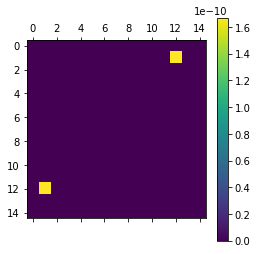

In [ ]:
plt.matshow(p_values)
plt.colorbar()

The feature, NC2.5 have a very low pearson correlation, and thus not so significant feature

Elbow Method 

In [ ]:
cluster_no = range(1,15)
wcss=[]
for no in cluster_no:
    km = KMeans(no,random_state=1)
    km.fit(smoke)
    wcss.append(km.inertia_)

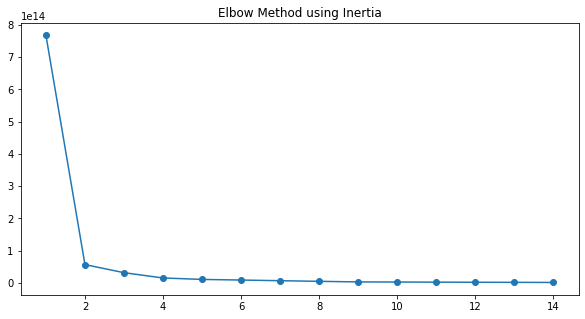

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Elbow Method using Inertia")
plt.plot(cluster_no,wcss,marker='o')

The best Cluster size is 2

Findings: the feature NC2.5 is not significant,There is a high correlation between PM and NC data, and there are some unwanted features like CNT and UTC that has nothing to do with the data. then we will drop some unwanted data with high correlation coefficient and low pearson correlation

**Data Transformation**

Dropping some features

In [ ]:
smoke = smoke.drop(['UTC', 'CNT',"PM1.0", "PM2.5", "NC2.5"],axis=1)
smoke.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],NC0.5,NC1.0,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0


Balancing the Data

In [ ]:
smoke['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

In [ ]:
on_fire = smoke[smoke['Fire Alarm'] == 1]
off_fire = smoke[smoke['Fire Alarm'] == 0]

In [ ]:
on_fire = on_fire.sample(n=len(off_fire),random_state=101)

In [ ]:
len(on_fire)

17873

In [ ]:
len(off_fire)

17873

In [ ]:
smoke=pd.concat([on_fire,off_fire],axis=0)
smoke['Fire Alarm'].value_counts()

1    17873
0    17873
Name: Fire Alarm, dtype: int64

**Clustering**

Show all the pairs

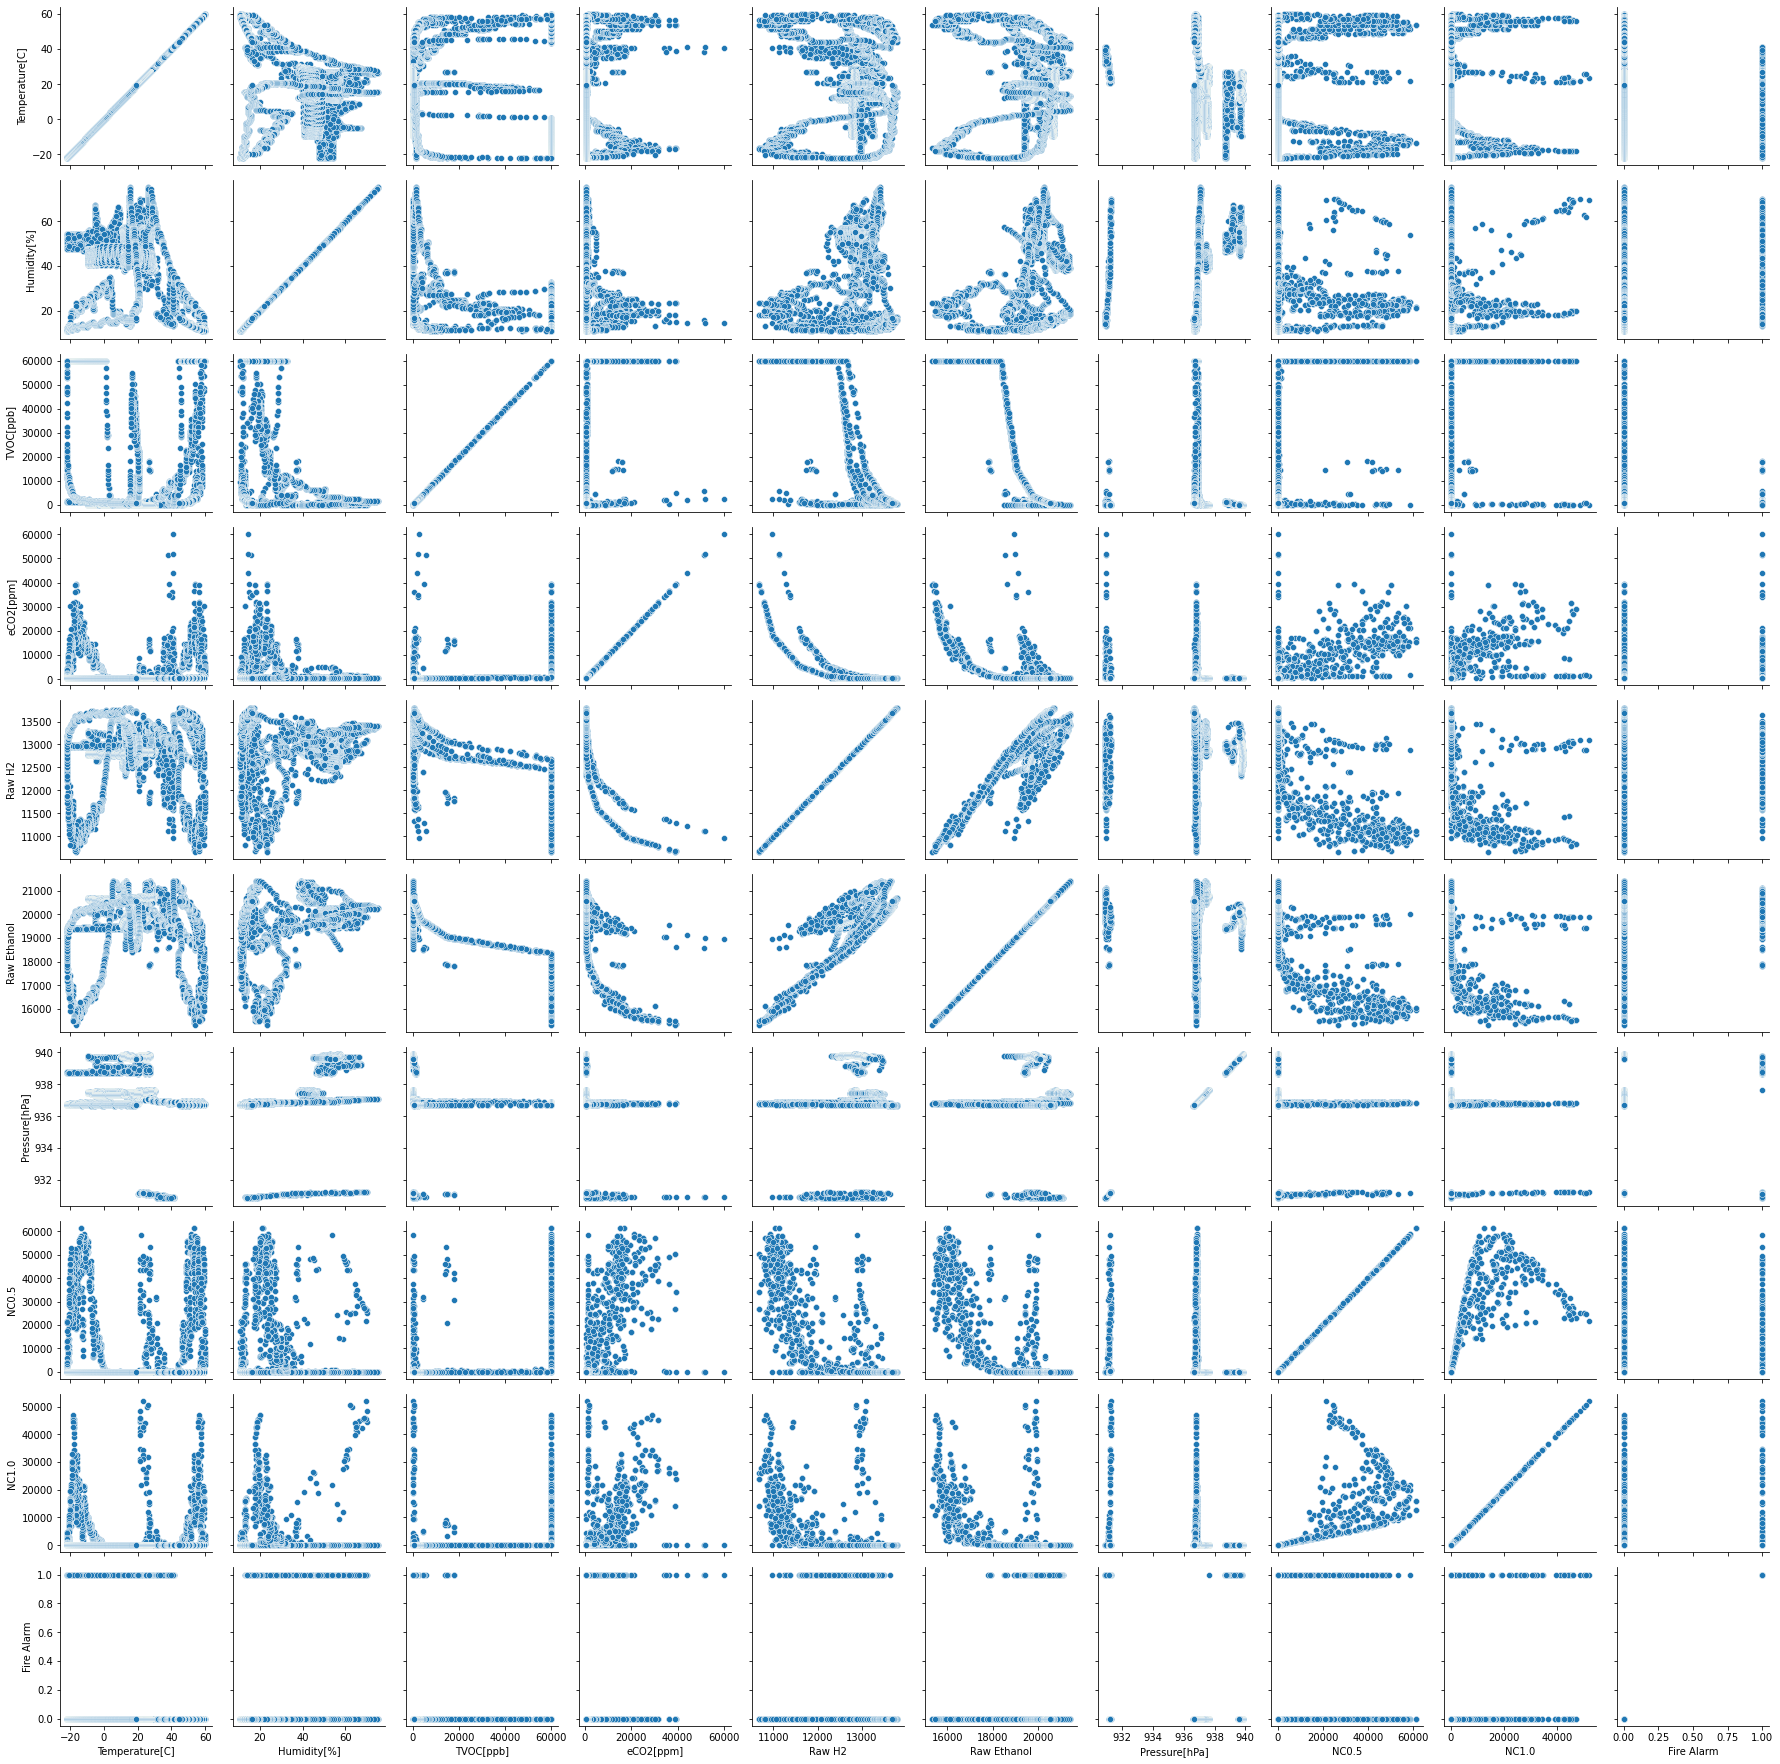

In [ ]:
g = sns.PairGrid(smoke)
g.map(sns.scatterplot)

K-Means Clustering with 2 clusters

In [ ]:
cluster = KMeans(2)

Fitting

In [ ]:
pred = cluster.fit_predict(smoke)

In [ ]:
smoke['cluster']=pred

In [ ]:
smoke.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],NC0.5,NC1.0,Fire Alarm,cluster
22689,-20.442,49.42,1337,401,12972,19393,938.758,13.09,2.042,1,0
15907,12.026,49.49,1099,404,12882,19455,938.785,14.09,2.197,1,0
29412,20.400,51.29,91,400,13231,20120,939.678,14.45,2.253,1,0
31470,18.890,55.72,191,400,13150,20063,939.651,4.07,0.635,1,0
42209,24.470,53.54,1166,414,12891,19442,938.774,10.55,1.646,1,0


Testing the cluster, showing all the pairs

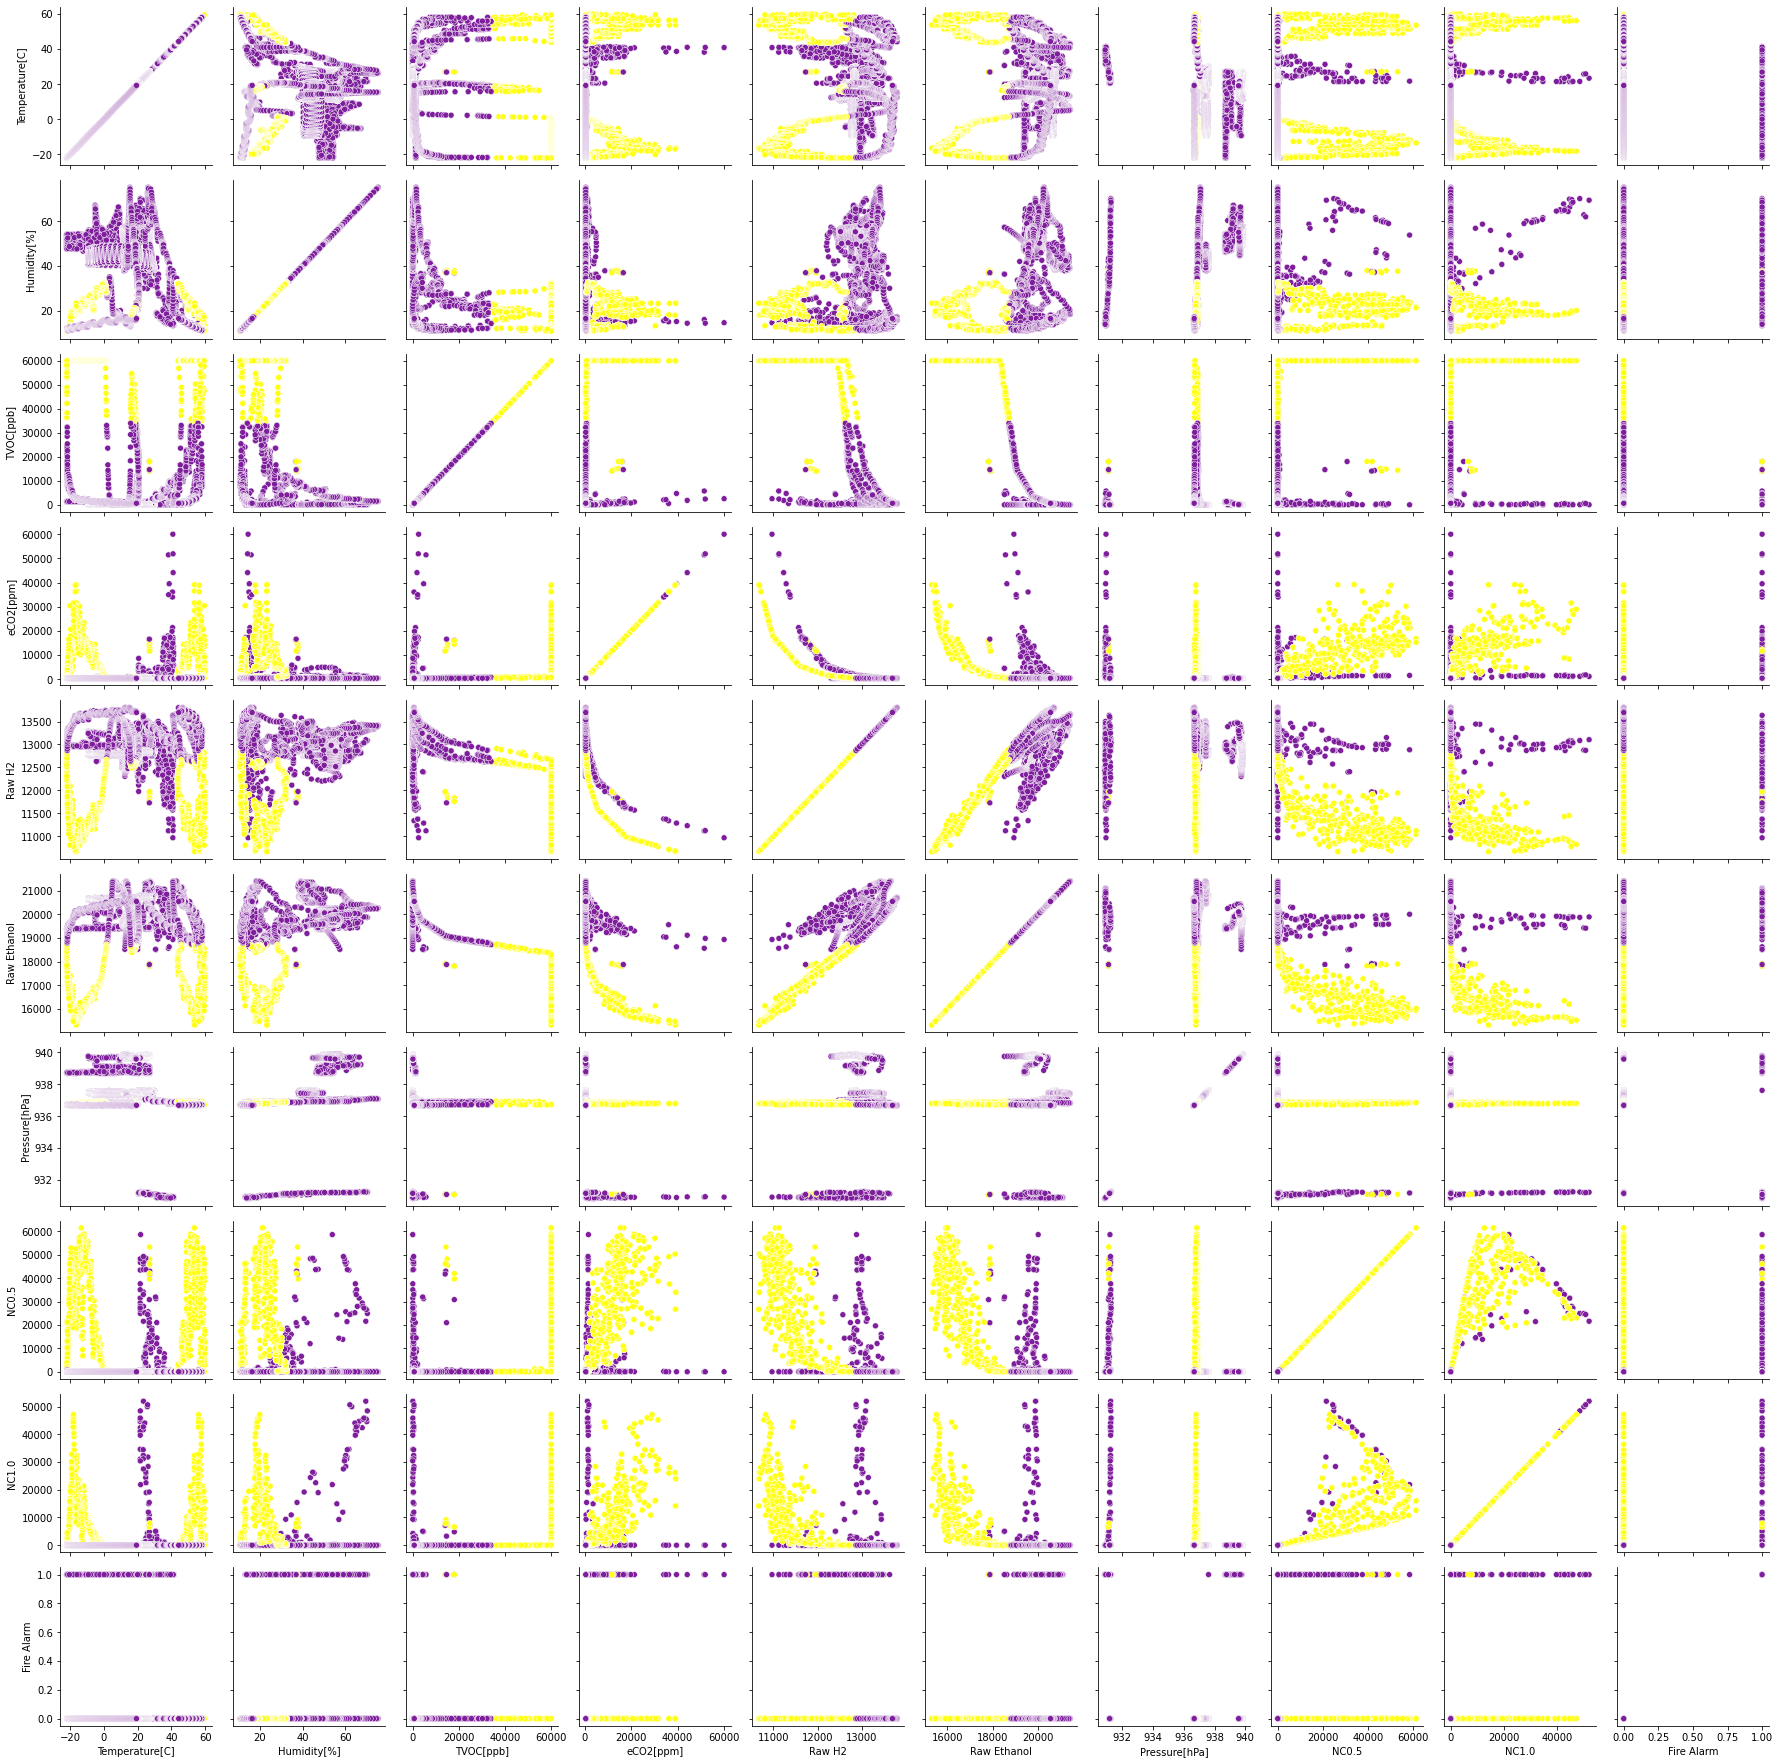

In [ ]:
colors = ['purple', 'yellow']
g = sns.PairGrid(smoke, hue='cluster', palette=sns.xkcd_palette(colors))
g.map(sns.scatterplot)